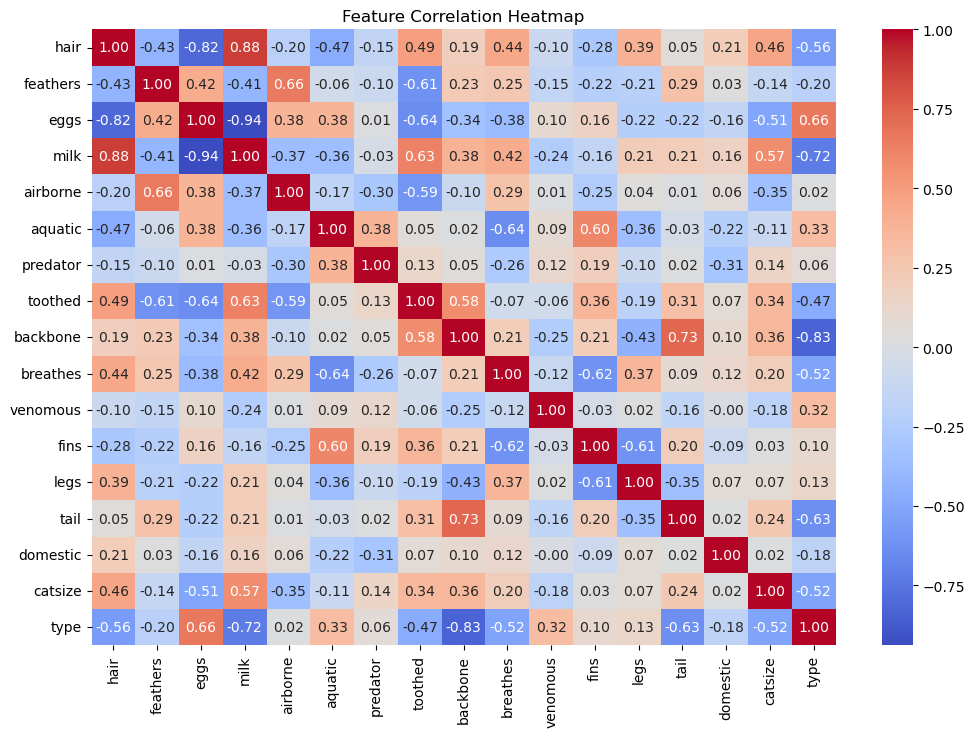

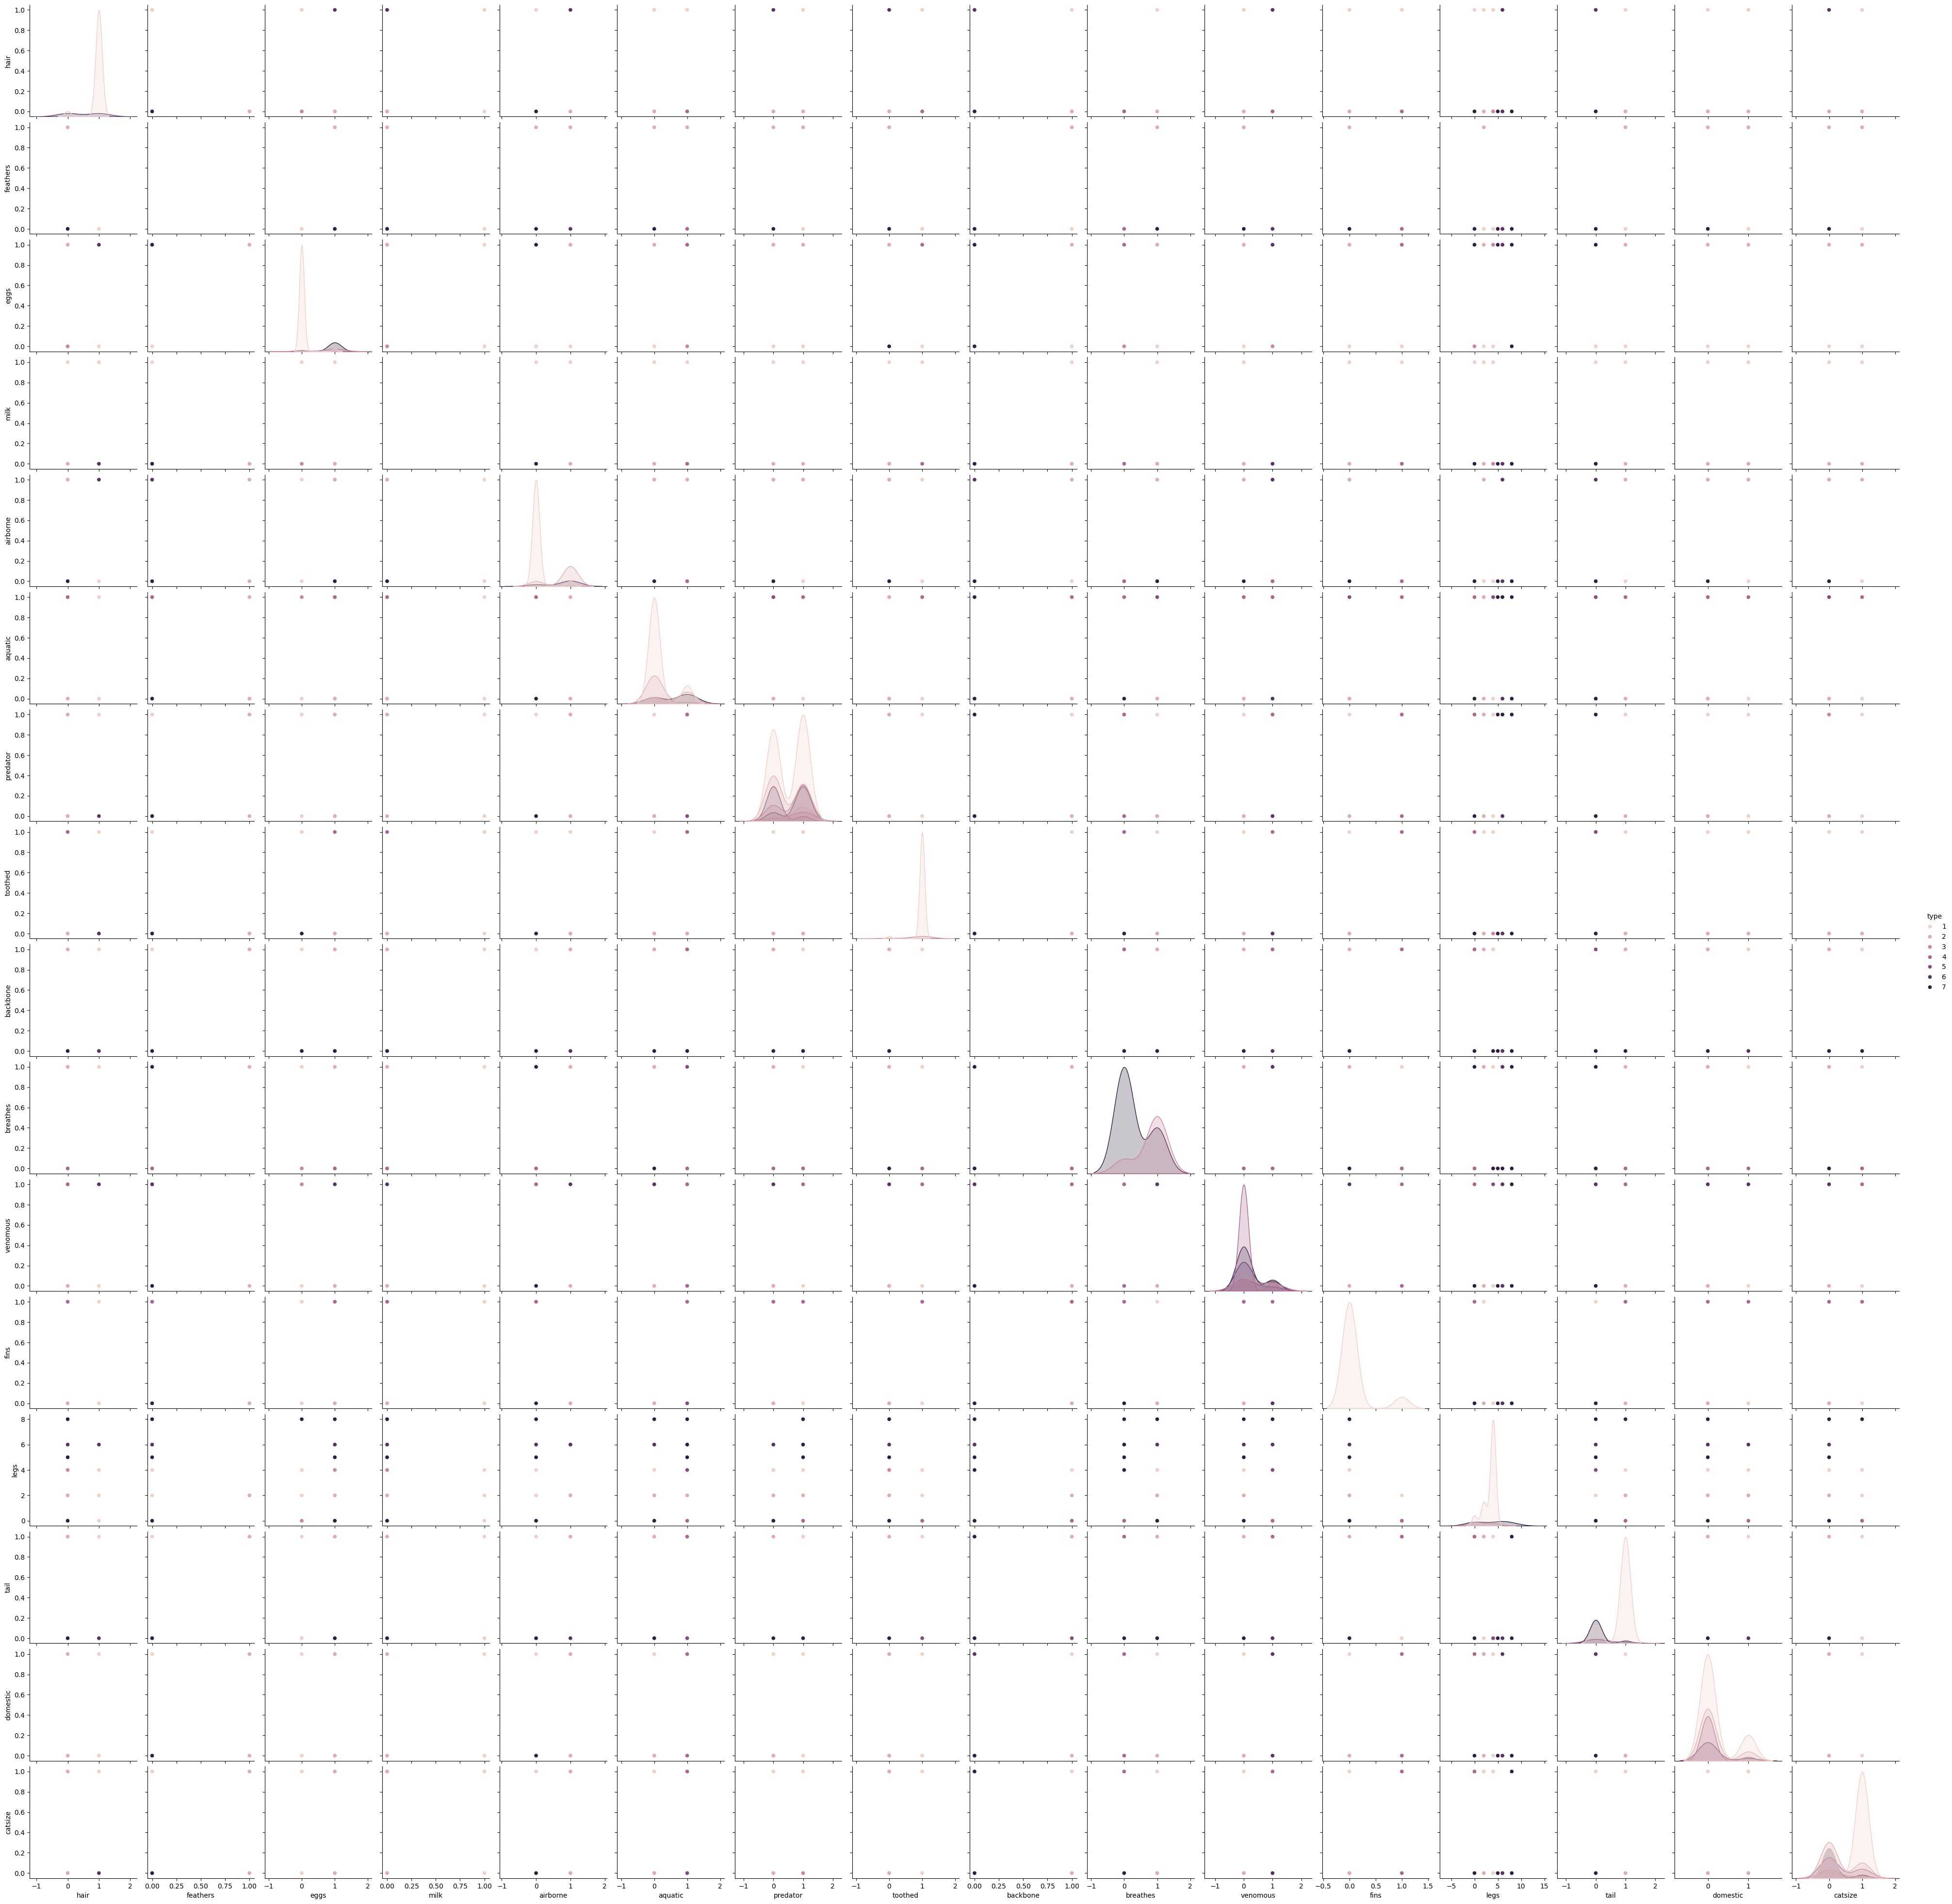

Missing values:
 hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64
KNN Accuracy: 0.89
KNN Precision: 0.95
KNN Recall: 0.89
KNN F1-score: 0.88

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.50      1.00      0.67         1
           6       0.50      1.00      0.67         1
           7       1.00      0.50      0.67         2

    accuracy                           0.89        19
   macro avg       0.86      0.79      0.71        19
weighted avg       0.95      0.89      0.88        19



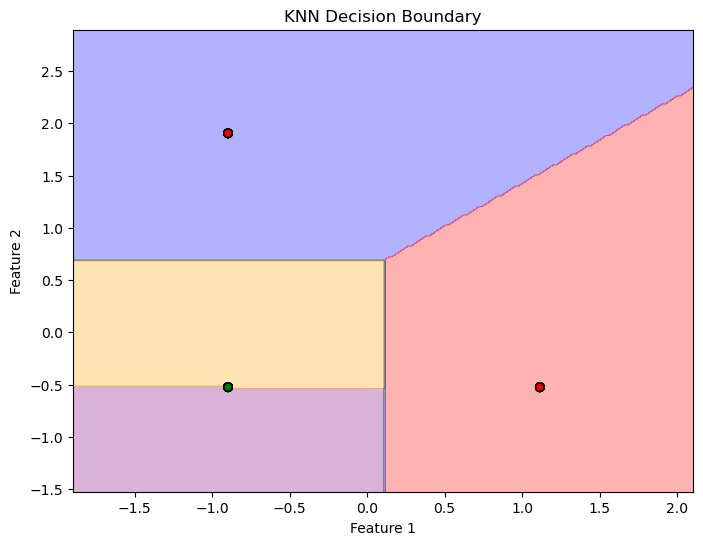

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from matplotlib.colors import ListedColormap
from scipy.stats import zscore

# Load dataset
df = pd.read_csv(r"D:\Data since couress\Completed\KNN\Zoo.csv")

# Drop non-numeric columns
df.drop(columns=["animal name"], inplace=True)

# Step 1: Data Analysis (EDA)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

sns.pairplot(df, hue="type", diag_kind="kde")
plt.show()

# Step 2: Data Preprocessing (Handling Missing Values & Outliers)
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Handling outliers using Z-score method
z_scores = np.abs(zscore(df.drop(columns=["type"])))
df_cleaned = df[(z_scores < 3).all(axis=1)]  # Remove outliers beyond 3 standard deviations

# Step 3: Split dataset into training and testing sets (80% training, 20% testing)
X = df_cleaned.drop(columns=["type"])  # Features
y = df_cleaned["type"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Implement KNN Algorithm
k = 3  # Choosing K=3 to avoid ignoring minority classes
knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
knn.fit(X_train_scaled, y_train)

# Step 5: Evaluate Classifier Performance
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted", zero_division=1)
recall = recall_score(y_test, y_pred, average="weighted", zero_division=1)
f1 = f1_score(y_test, y_pred, average="weighted", zero_division=1)

print(f"KNN Accuracy: {accuracy:.2f}")
print(f"KNN Precision: {precision:.2f}")
print(f"KNN Recall: {recall:.2f}")
print(f"KNN F1-score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# Step 6: Decision Boundary Visualization (for 2 features)
def plot_decision_boundary(X, y, model):
    h = 0.02  # Step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(["red", "blue", "green", "purple", "orange"]))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=ListedColormap(["red", "blue", "green", "purple", "orange"]))
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("KNN Decision Boundary")
    plt.show()

# Select two features for visualization
X_vis = X_train_scaled[:, [0, 1]]
X_test_vis = X_test_scaled[:, [0, 1]]

# Train KNN on only two features
knn_vis = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
knn_vis.fit(X_vis, y_train)

# Plot decision boundary
plot_decision_boundary(X_vis, y_train, knn_vis)